In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [2]:
df = pd.read_csv("newMushroom20noise.csv", sep=',')
df.columns.values
df.shape

(5644, 24)

In [3]:
data = df.iloc[:,1:23]
labels = df.iloc[:,23].astype(str)

In [4]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

              precision    recall  f1-score   support

           e       0.90      0.89      0.89      1719
           p       0.83      0.84      0.83      1103

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.868532955350815


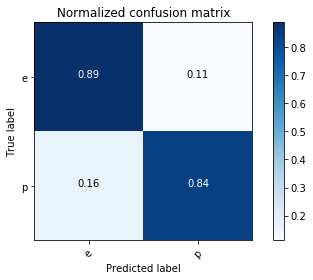

              precision    recall  f1-score   support

           e       0.90      0.90      0.90      1769
           p       0.83      0.84      0.83      1053

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.87      0.87      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8759744861800142


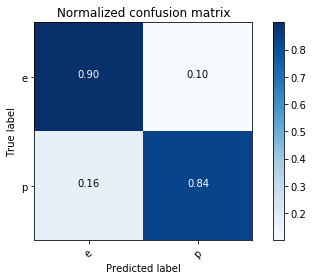

              precision    recall  f1-score   support

           e       0.89      0.90      0.89      1740
           p       0.84      0.82      0.83      1082

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8688873139617292


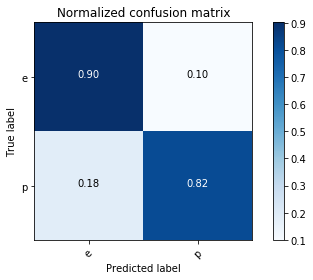

              precision    recall  f1-score   support

           e       0.90      0.88      0.89      1748
           p       0.81      0.83      0.82      1074

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.86      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8610914245216159


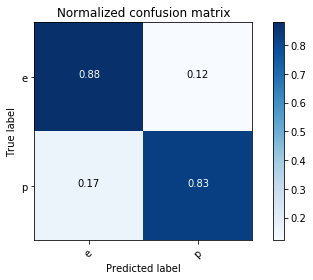

              precision    recall  f1-score   support

           e       0.90      0.89      0.89      1751
           p       0.82      0.84      0.83      1071

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8695960311835578


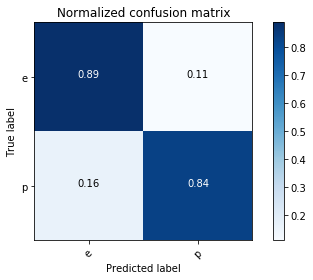

              precision    recall  f1-score   support

           e       0.89      0.89      0.89      1737
           p       0.83      0.82      0.82      1085

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8653437278525868


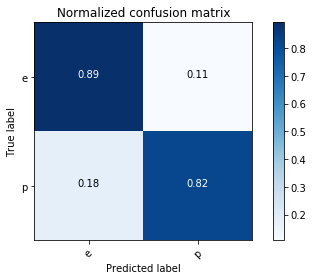

              precision    recall  f1-score   support

           e       0.90      0.88      0.89      1742
           p       0.81      0.84      0.83      1080

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.86      0.86      2822

accuracy:  0.864280652019844


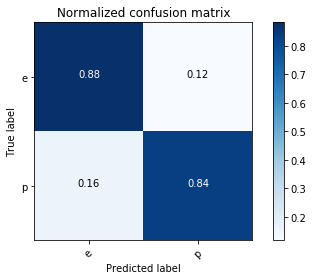

              precision    recall  f1-score   support

           e       0.89      0.90      0.90      1746
           p       0.84      0.82      0.83      1076

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8727852586817859


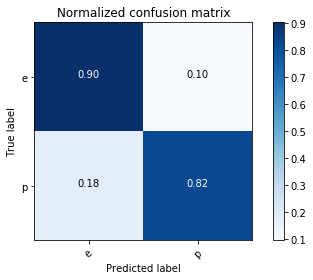

              precision    recall  f1-score   support

           e       0.89      0.91      0.90      1728
           p       0.84      0.82      0.83      1094

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8710134656272147


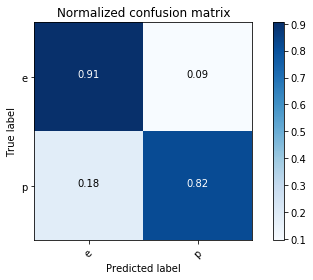

              precision    recall  f1-score   support

           e       0.91      0.88      0.89      1760
           p       0.81      0.85      0.83      1062

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.87      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8688873139617292


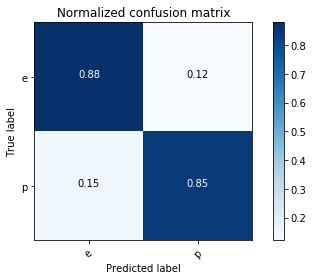

In [6]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.88      0.91      0.90      1746
           p       0.85      0.81      0.82      1076

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8695960311835578


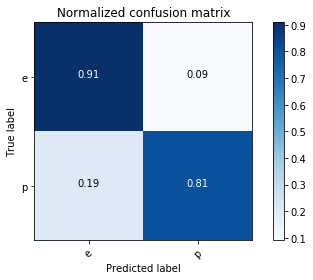

              precision    recall  f1-score   support

           e       0.89      0.90      0.90      1742
           p       0.84      0.81      0.83      1080

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8692416725726435


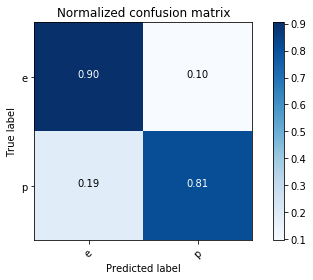

              precision    recall  f1-score   support

           e       0.88      0.91      0.90      1722
           p       0.86      0.81      0.83      1100

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.87      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8738483345145287


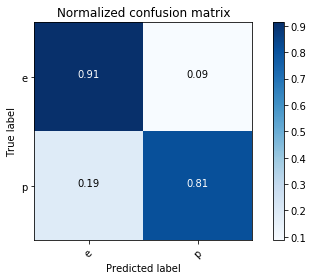

              precision    recall  f1-score   support

           e       0.89      0.91      0.90      1766
           p       0.84      0.80      0.82      1056

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8703047484053863


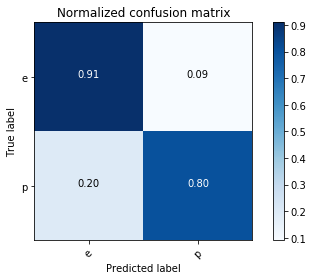

              precision    recall  f1-score   support

           e       0.89      0.91      0.90      1747
           p       0.85      0.83      0.84      1075

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.87      0.87      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8791637136782424


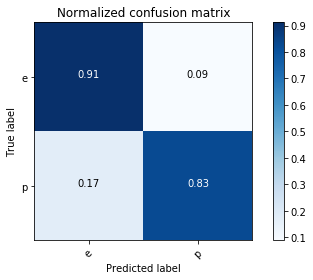

              precision    recall  f1-score   support

           e       0.87      0.89      0.88      1741
           p       0.82      0.79      0.81      1081

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.84      0.85      2822
weighted avg       0.85      0.86      0.85      2822

accuracy:  0.8550673281360737


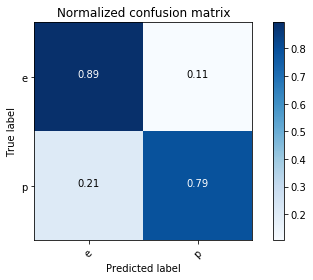

              precision    recall  f1-score   support

           e       0.89      0.91      0.90      1772
           p       0.84      0.82      0.83      1050

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.87      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8745570517363572


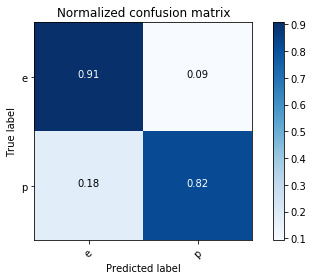

              precision    recall  f1-score   support

           e       0.87      0.90      0.89      1716
           p       0.84      0.79      0.81      1106

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8582565556343019


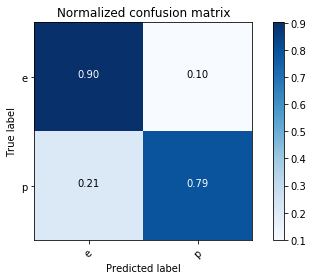

              precision    recall  f1-score   support

           e       0.88      0.91      0.90      1733
           p       0.85      0.81      0.83      1089

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8692416725726435


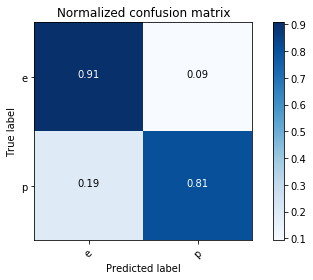

              precision    recall  f1-score   support

           e       0.88      0.92      0.90      1755
           p       0.86      0.79      0.82      1067

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8710134656272147


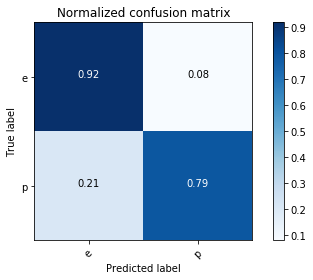

In [7]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.86      0.95      0.90      1738
           p       0.90      0.75      0.82      1084

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.88      0.85      0.86      2822
weighted avg       0.88      0.87      0.87      2822

accuracy:  0.8731396172927002


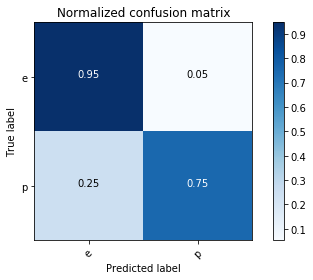

              precision    recall  f1-score   support

           e       0.88      0.92      0.90      1750
           p       0.86      0.80      0.83      1072

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.874202693125443


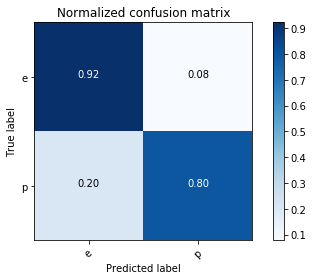

              precision    recall  f1-score   support

           e       0.87      0.94      0.90      1749
           p       0.89      0.76      0.82      1073

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.88      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8738483345145287


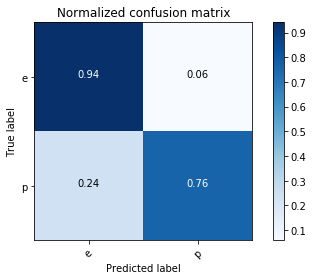

              precision    recall  f1-score   support

           e       0.88      0.92      0.90      1739
           p       0.87      0.79      0.83      1083

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8724309000708718


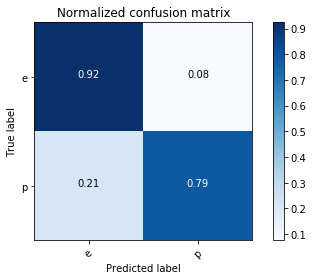

              precision    recall  f1-score   support

           e       0.86      0.94      0.89      1748
           p       0.88      0.74      0.81      1074

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.87      0.84      0.85      2822
weighted avg       0.87      0.86      0.86      2822

accuracy:  0.8635719347980156


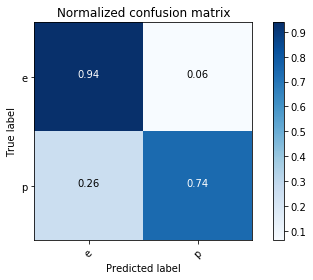

              precision    recall  f1-score   support

           e       0.89      0.92      0.90      1740
           p       0.87      0.81      0.84      1082

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.87      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8784549964564139


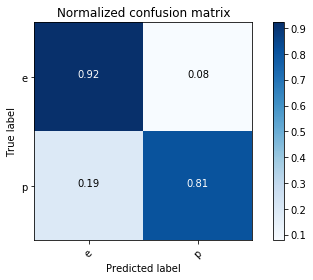

              precision    recall  f1-score   support

           e       0.87      0.94      0.90      1745
           p       0.88      0.78      0.83      1077

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.86      0.86      2822
weighted avg       0.88      0.88      0.87      2822

accuracy:  0.8756201275690999


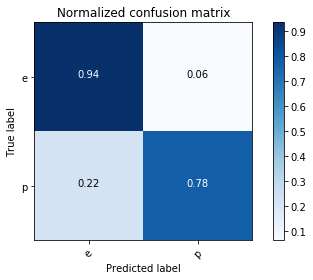

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1743
           p       0.88      0.77      0.82      1079

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.871367824238129


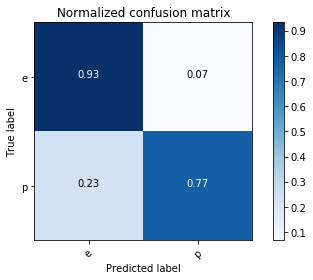

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1783
           p       0.87      0.76      0.81      1039

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8703047484053863


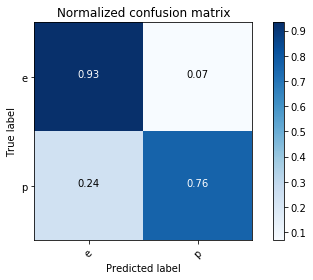

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1705
           p       0.88      0.77      0.82      1117

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8681785967399008


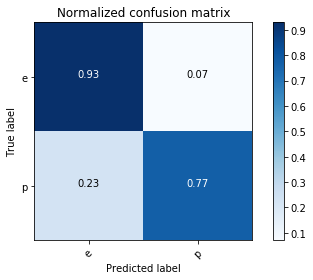

In [8]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.87      0.92      0.89      1741
           p       0.86      0.78      0.81      1081

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.864280652019844


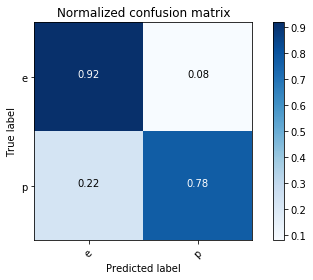

              precision    recall  f1-score   support

           e       0.87      0.92      0.90      1747
           p       0.86      0.79      0.82      1075

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.869950389794472


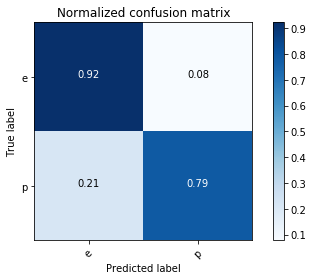

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1768
           p       0.86      0.78      0.82      1054

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.869950389794472


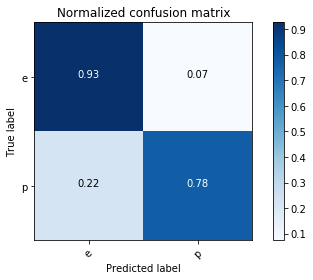

              precision    recall  f1-score   support

           e       0.87      0.91      0.89      1720
           p       0.85      0.80      0.82      1102

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.85      0.86      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8646350106307583


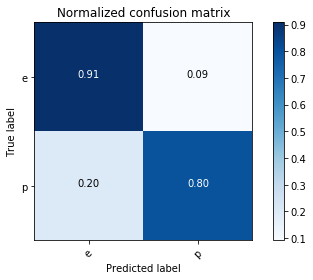

              precision    recall  f1-score   support

           e       0.88      0.92      0.90      1764
           p       0.86      0.78      0.82      1058

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8695960311835578


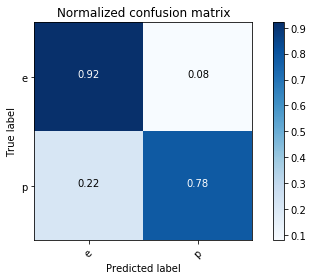

              precision    recall  f1-score   support

           e       0.87      0.91      0.89      1724
           p       0.85      0.79      0.82      1098

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8635719347980156


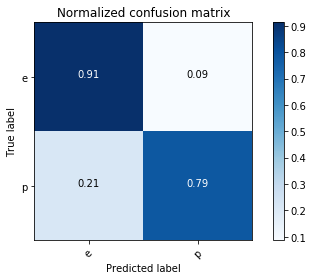

              precision    recall  f1-score   support

           e       0.88      0.91      0.90      1756
           p       0.84      0.80      0.82      1066

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.868532955350815


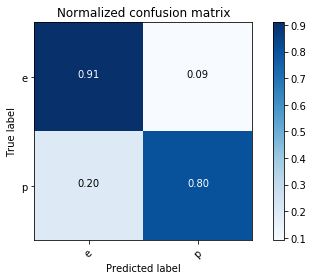

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1732
           p       0.87      0.78      0.82      1090

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8681785967399008


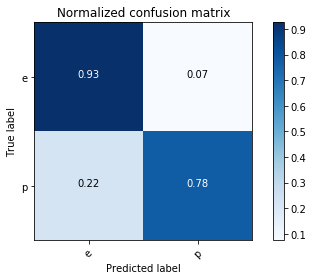

              precision    recall  f1-score   support

           e       0.87      0.92      0.90      1760
           p       0.85      0.78      0.81      1062

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.85      0.85      2822
weighted avg       0.87      0.87      0.86      2822

accuracy:  0.8656980864635011


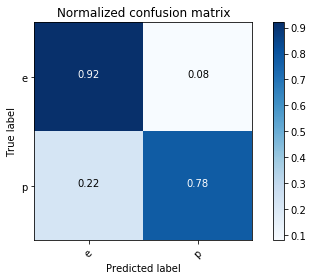

              precision    recall  f1-score   support

           e       0.87      0.92      0.89      1728
           p       0.86      0.78      0.82      1094

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8664068036853295


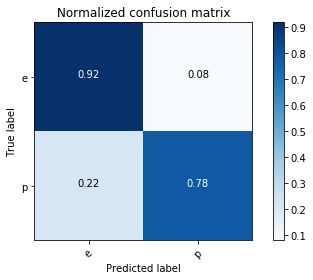

In [9]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.88      0.92      0.90      1745
           p       0.86      0.79      0.82      1077

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8688873139617292


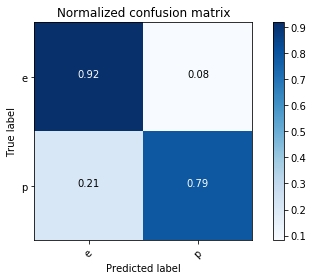

              precision    recall  f1-score   support

           e       0.85      0.94      0.89      1743
           p       0.88      0.73      0.80      1079

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.83      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.8571934798015591


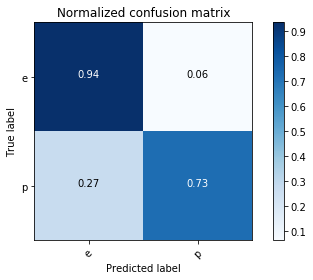

              precision    recall  f1-score   support

           e       0.88      0.92      0.90      1742
           p       0.87      0.79      0.83      1080

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8731396172927002


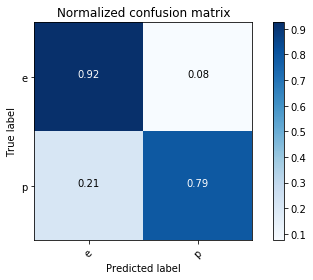

              precision    recall  f1-score   support

           e       0.85      0.94      0.89      1746
           p       0.88      0.72      0.79      1076

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.83      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.8561304039688165


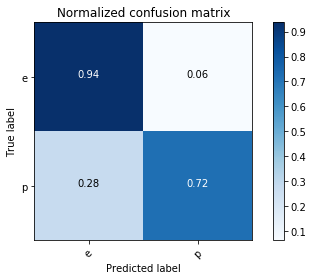

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1760
           p       0.86      0.74      0.80      1062

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.83      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.8564847625797307


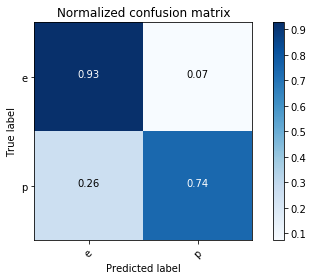

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1728
           p       0.87      0.78      0.82      1094

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8703047484053863


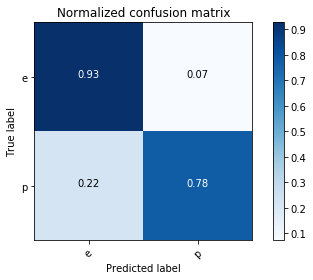

              precision    recall  f1-score   support

           e       0.87      0.92      0.89      1757
           p       0.86      0.76      0.81      1065

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8625088589652729


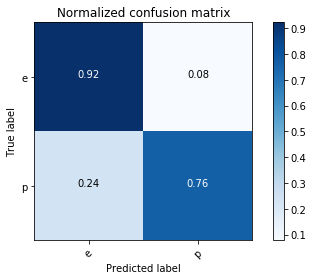

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1731
           p       0.87      0.77      0.81      1091

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.87      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8646350106307583


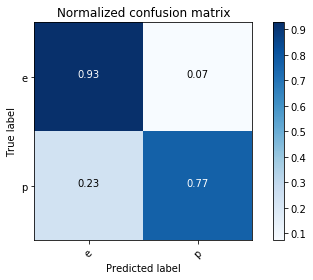

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1735
           p       0.87      0.76      0.81      1087

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.85      2822
weighted avg       0.87      0.87      0.86      2822

accuracy:  0.8653437278525868


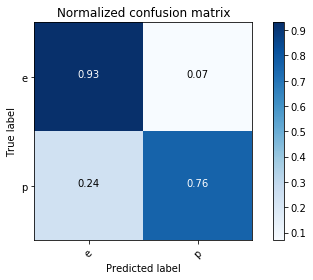

              precision    recall  f1-score   support

           e       0.86      0.92      0.89      1753
           p       0.86      0.75      0.80      1069

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.856839121190645


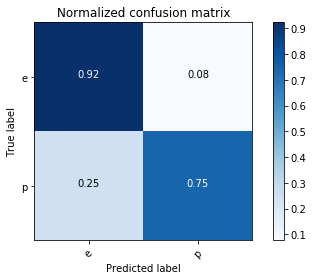

In [10]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.85      0.94      0.89      1739
           p       0.88      0.73      0.80      1083

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.83      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.8561304039688165


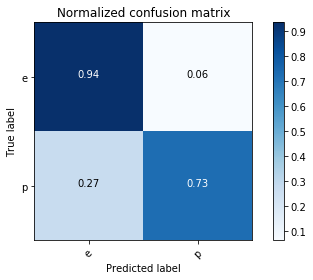

              precision    recall  f1-score   support

           e       0.85      0.92      0.88      1749
           p       0.84      0.75      0.79      1073

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.83      0.84      2822
weighted avg       0.85      0.85      0.85      2822

accuracy:  0.851169383416017


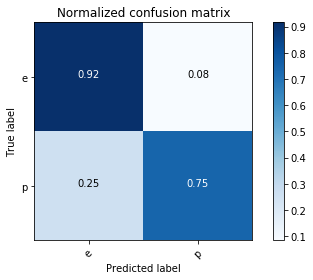

              precision    recall  f1-score   support

           e       0.85      0.92      0.88      1725
           p       0.86      0.74      0.79      1097

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.83      0.84      2822
weighted avg       0.85      0.85      0.85      2822

accuracy:  0.8508150248051027


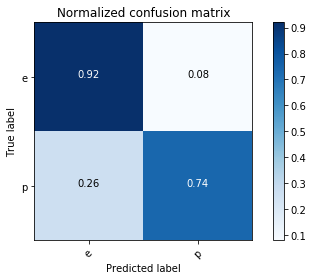

              precision    recall  f1-score   support

           e       0.84      0.94      0.89      1763
           p       0.88      0.71      0.78      1059

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.86      0.82      0.84      2822
weighted avg       0.86      0.85      0.85      2822

accuracy:  0.8536498936924167


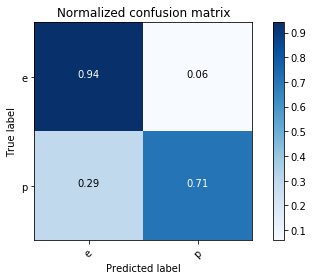

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1758
           p       0.86      0.75      0.80      1064

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8618001417434443


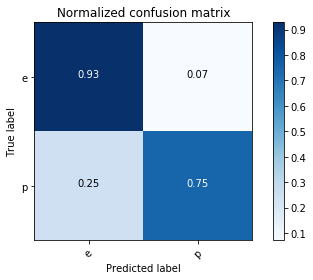

              precision    recall  f1-score   support

           e       0.84      0.93      0.88      1730
           p       0.87      0.72      0.79      1092

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.83      0.84      2822
weighted avg       0.85      0.85      0.85      2822

accuracy:  0.8501063075832743


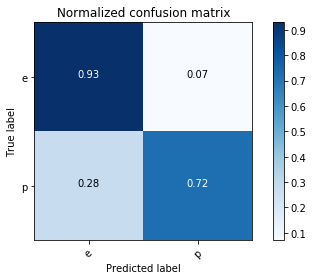

              precision    recall  f1-score   support

           e       0.84      0.94      0.89      1734
           p       0.88      0.73      0.79      1088

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.83      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.8550673281360737


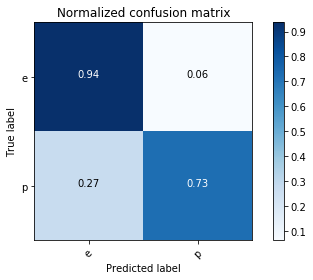

              precision    recall  f1-score   support

           e       0.86      0.92      0.89      1754
           p       0.86      0.75      0.80      1068

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8589652728561304


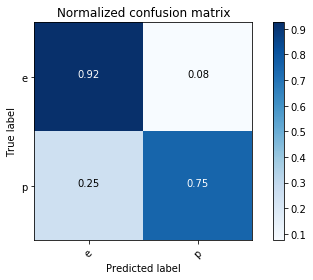

              precision    recall  f1-score   support

           e       0.85      0.92      0.89      1726
           p       0.86      0.75      0.80      1096

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.83      0.84      2822
weighted avg       0.85      0.85      0.85      2822

accuracy:  0.8536498936924167


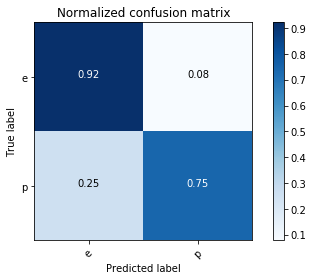

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1762
           p       0.86      0.74      0.80      1060

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8593196314670446


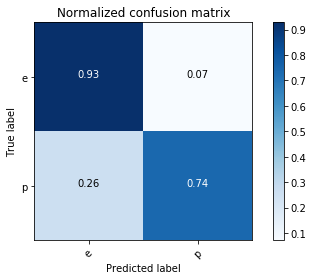

In [11]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.82      0.94      0.87      1754
           p       0.86      0.66      0.75      1068

   micro avg       0.83      0.83      0.83      2822
   macro avg       0.84      0.80      0.81      2822
weighted avg       0.84      0.83      0.83      2822

accuracy:  0.8316796598157336


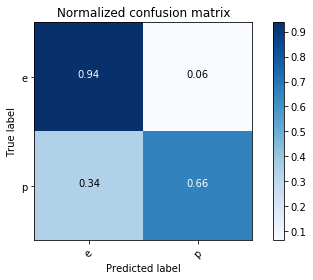

              precision    recall  f1-score   support

           e       0.83      0.93      0.88      1734
           p       0.87      0.69      0.77      1088

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.85      0.81      0.82      2822
weighted avg       0.84      0.84      0.84      2822

accuracy:  0.8408929836995039


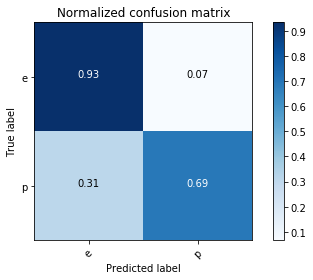

              precision    recall  f1-score   support

           e       0.83      0.93      0.88      1773
           p       0.85      0.69      0.76      1049

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.84      0.81      0.82      2822
weighted avg       0.84      0.84      0.83      2822

accuracy:  0.836640680368533


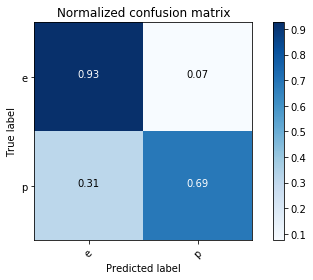

              precision    recall  f1-score   support

           e       0.82      0.95      0.88      1715
           p       0.90      0.67      0.77      1107

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.86      0.81      0.82      2822
weighted avg       0.85      0.84      0.84      2822

accuracy:  0.8412473423104181


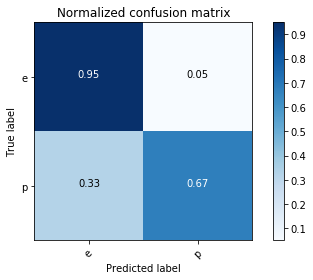

              precision    recall  f1-score   support

           e       0.83      0.94      0.88      1751
           p       0.87      0.68      0.76      1071

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.85      0.81      0.82      2822
weighted avg       0.84      0.84      0.84      2822

accuracy:  0.8408929836995039


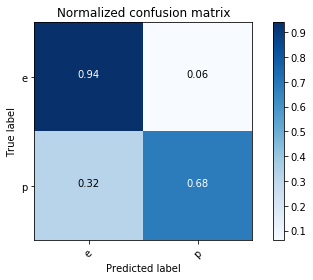

              precision    recall  f1-score   support

           e       0.83      0.93      0.87      1737
           p       0.86      0.69      0.76      1085

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.84      0.81      0.82      2822
weighted avg       0.84      0.84      0.83      2822

accuracy:  0.8359319631467045


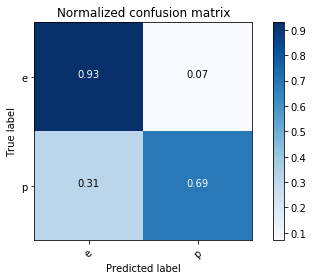

              precision    recall  f1-score   support

           e       0.84      0.93      0.88      1740
           p       0.86      0.72      0.78      1082

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.82      0.83      2822
weighted avg       0.85      0.85      0.85      2822

accuracy:  0.848334514528703


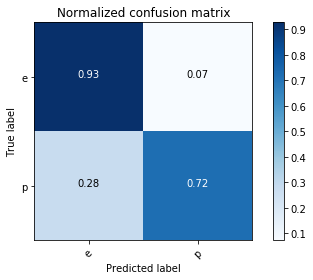

              precision    recall  f1-score   support

           e       0.81      0.95      0.87      1748
           p       0.88      0.63      0.73      1074

   micro avg       0.82      0.82      0.82      2822
   macro avg       0.84      0.79      0.80      2822
weighted avg       0.83      0.82      0.82      2822

accuracy:  0.8245924875974486


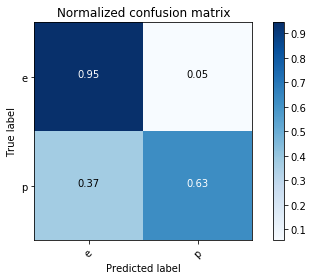

              precision    recall  f1-score   support

           e       0.84      0.94      0.89      1755
           p       0.87      0.71      0.78      1067

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.86      0.82      0.83      2822
weighted avg       0.85      0.85      0.85      2822

accuracy:  0.851169383416017


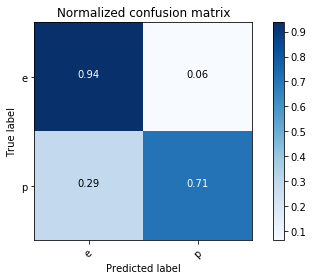

              precision    recall  f1-score   support

           e       0.80      0.93      0.86      1733
           p       0.85      0.64      0.73      1089

   micro avg       0.82      0.82      0.82      2822
   macro avg       0.83      0.78      0.80      2822
weighted avg       0.82      0.82      0.81      2822

accuracy:  0.8167965981573352


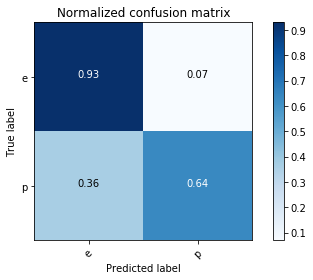

In [12]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.77      0.98      0.86      1752
           p       0.93      0.53      0.68      1070

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.85      0.75      0.77      2822
weighted avg       0.83      0.81      0.79      2822

accuracy:  0.8075832742735648


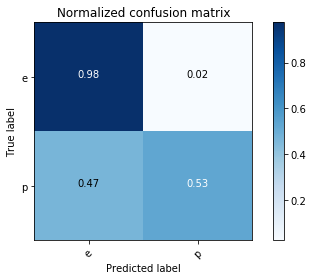

              precision    recall  f1-score   support

           e       0.79      0.95      0.86      1736
           p       0.88      0.61      0.72      1086

   micro avg       0.82      0.82      0.82      2822
   macro avg       0.84      0.78      0.79      2822
weighted avg       0.83      0.82      0.81      2822

accuracy:  0.8171509567682494


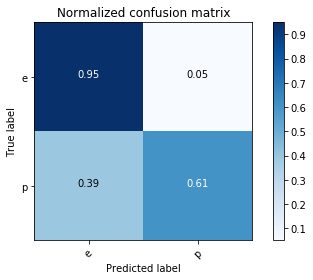

              precision    recall  f1-score   support

           e       0.80      0.94      0.87      1763
           p       0.87      0.61      0.72      1059

   micro avg       0.82      0.82      0.82      2822
   macro avg       0.84      0.78      0.79      2822
weighted avg       0.83      0.82      0.81      2822

accuracy:  0.8196314670446492


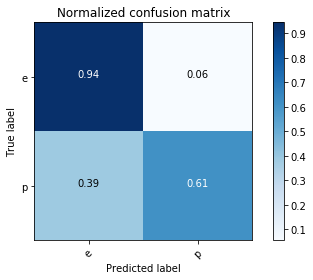

              precision    recall  f1-score   support

           e       0.76      0.98      0.86      1725
           p       0.94      0.52      0.67      1097

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.85      0.75      0.76      2822
weighted avg       0.83      0.80      0.78      2822

accuracy:  0.7994330262225372


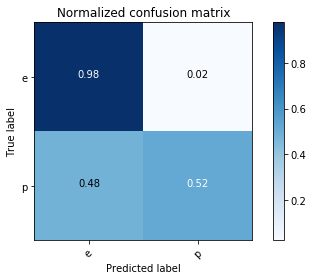

              precision    recall  f1-score   support

           e       0.79      0.96      0.86      1750
           p       0.89      0.58      0.70      1072

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.84      0.77      0.78      2822
weighted avg       0.83      0.81      0.80      2822

accuracy:  0.81218993621545


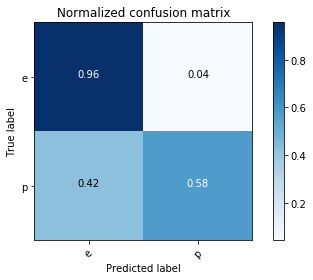

              precision    recall  f1-score   support

           e       0.77      0.96      0.86      1738
           p       0.91      0.54      0.68      1084

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.84      0.75      0.77      2822
weighted avg       0.82      0.80      0.79      2822

accuracy:  0.8026222537207655


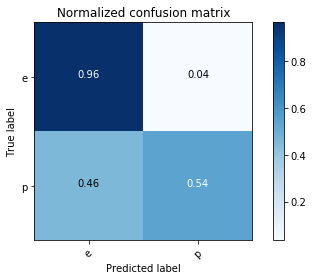

              precision    recall  f1-score   support

           e       0.78      0.97      0.86      1721
           p       0.92      0.57      0.71      1101

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.85      0.77      0.79      2822
weighted avg       0.84      0.81      0.80      2822

accuracy:  0.8146704464918497


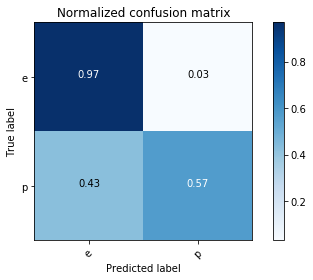

              precision    recall  f1-score   support

           e       0.78      0.96      0.86      1767
           p       0.88      0.56      0.69      1055

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.83      0.76      0.77      2822
weighted avg       0.82      0.81      0.80      2822

accuracy:  0.8079376328844791


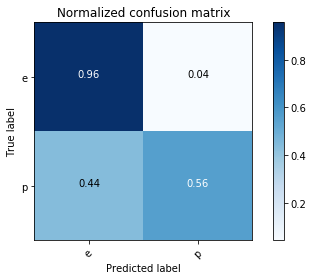

              precision    recall  f1-score   support

           e       0.78      0.96      0.86      1737
           p       0.90      0.57      0.70      1085

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.84      0.76      0.78      2822
weighted avg       0.83      0.81      0.80      2822

accuracy:  0.8097094259390503


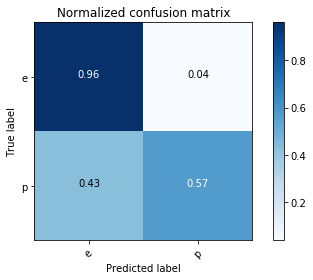

              precision    recall  f1-score   support

           e       0.78      0.96      0.86      1751
           p       0.90      0.56      0.69      1071

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.84      0.76      0.78      2822
weighted avg       0.83      0.81      0.80      2822

accuracy:  0.8093550673281361


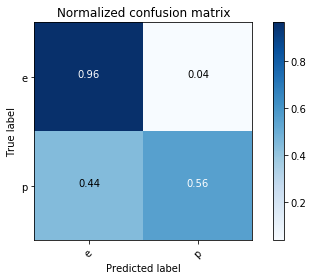

In [13]:
acc.append("Euclidean 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.75      0.99      0.85      1722
           p       0.97      0.49      0.65      1100

   micro avg       0.79      0.79      0.79      2822
   macro avg       0.86      0.74      0.75      2822
weighted avg       0.83      0.79      0.77      2822

accuracy:  0.7934089298369951


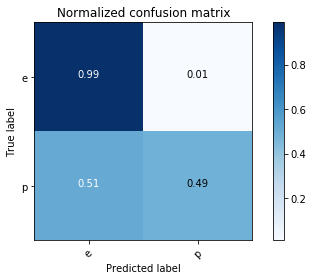

              precision    recall  f1-score   support

           e       0.77      0.98      0.86      1766
           p       0.95      0.51      0.66      1056

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.86      0.74      0.76      2822
weighted avg       0.84      0.80      0.79      2822

accuracy:  0.8047484053862509


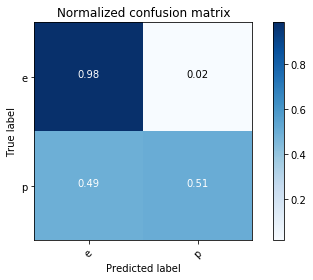

              precision    recall  f1-score   support

           e       0.75      0.99      0.85      1738
           p       0.96      0.47      0.63      1084

   micro avg       0.79      0.79      0.79      2822
   macro avg       0.86      0.73      0.74      2822
weighted avg       0.83      0.79      0.77      2822

accuracy:  0.7905740609496811


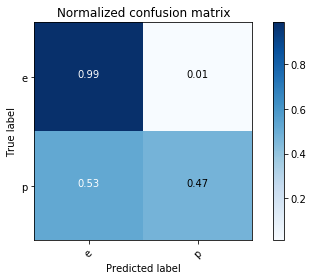

              precision    recall  f1-score   support

           e       0.77      0.99      0.87      1750
           p       0.96      0.52      0.68      1072

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.86      0.75      0.77      2822
weighted avg       0.84      0.81      0.79      2822

accuracy:  0.8093550673281361


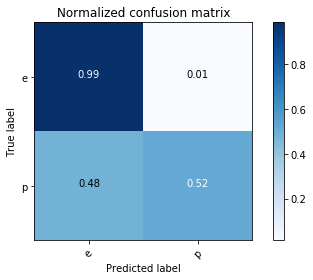

              precision    recall  f1-score   support

           e       0.75      0.98      0.85      1746
           p       0.93      0.47      0.62      1076

   micro avg       0.78      0.78      0.78      2822
   macro avg       0.84      0.72      0.74      2822
weighted avg       0.82      0.78      0.76      2822

accuracy:  0.7838412473423104


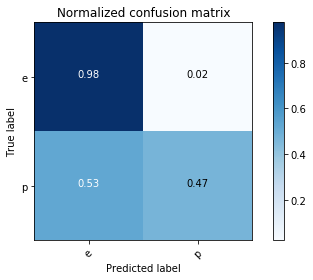

              precision    recall  f1-score   support

           e       0.77      0.99      0.87      1742
           p       0.98      0.52      0.68      1080

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.88      0.76      0.78      2822
weighted avg       0.85      0.81      0.80      2822

accuracy:  0.8143160878809355


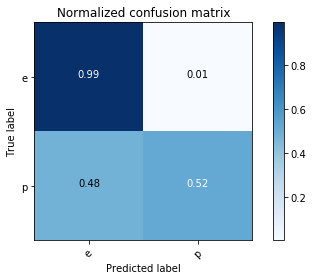

              precision    recall  f1-score   support

           e       0.76      0.99      0.86      1732
           p       0.97      0.51      0.67      1090

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.87      0.75      0.76      2822
weighted avg       0.84      0.80      0.79      2822

accuracy:  0.8036853295535081


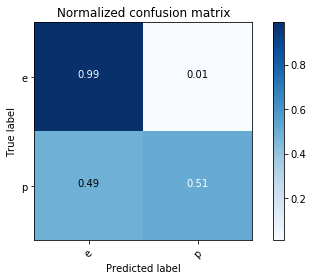

              precision    recall  f1-score   support

           e       0.76      0.98      0.86      1756
           p       0.95      0.49      0.64      1066

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.85      0.74      0.75      2822
weighted avg       0.83      0.80      0.78      2822

accuracy:  0.7958894401133948


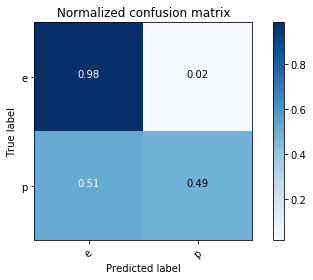

              precision    recall  f1-score   support

           e       0.76      0.99      0.86      1745
           p       0.98      0.51      0.67      1077

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.87      0.75      0.76      2822
weighted avg       0.85      0.81      0.79      2822

accuracy:  0.8065201984408221


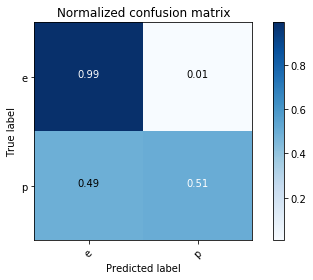

              precision    recall  f1-score   support

           e       0.76      0.98      0.86      1743
           p       0.94      0.49      0.65      1079

   micro avg       0.79      0.79      0.79      2822
   macro avg       0.85      0.74      0.75      2822
weighted avg       0.83      0.79      0.78      2822

accuracy:  0.794826364280652


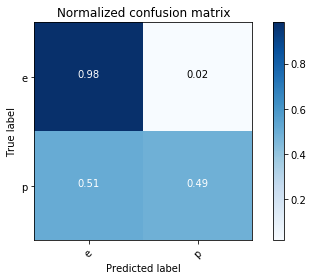

In [14]:
acc.append("Euclidean 150")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

              precision    recall  f1-score   support

           e       0.90      0.89      0.89      1748
           p       0.82      0.83      0.83      1074

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8692416725726435


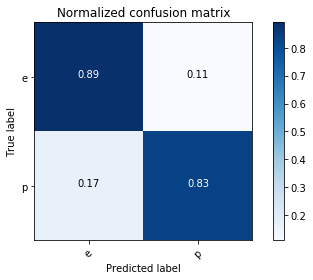

              precision    recall  f1-score   support

           e       0.89      0.90      0.89      1740
           p       0.83      0.83      0.83      1082

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8695960311835578


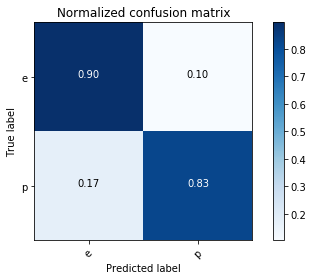

              precision    recall  f1-score   support

           e       0.90      0.88      0.89      1760
           p       0.81      0.84      0.82      1062

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.86      0.86      2822
weighted avg       0.87      0.86      0.86      2822

accuracy:  0.864280652019844


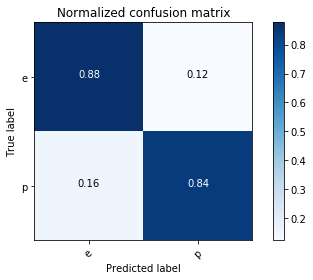

              precision    recall  f1-score   support

           e       0.88      0.91      0.89      1728
           p       0.84      0.81      0.83      1094

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.868532955350815


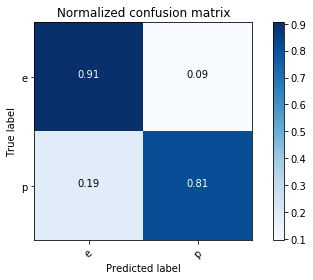

              precision    recall  f1-score   support

           e       0.89      0.89      0.89      1758
           p       0.82      0.82      0.82      1064

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8621545003543586


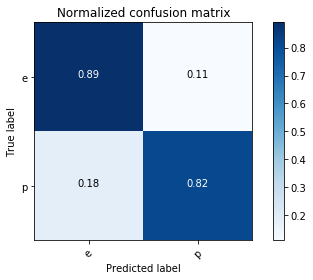

              precision    recall  f1-score   support

           e       0.89      0.89      0.89      1730
           p       0.82      0.83      0.83      1092

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.864280652019844


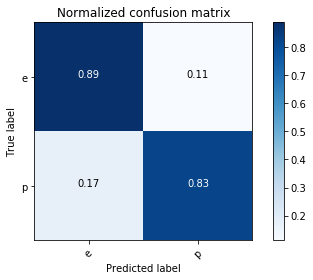

              precision    recall  f1-score   support

           e       0.90      0.88      0.89      1744
           p       0.82      0.84      0.83      1078

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8660524450744153


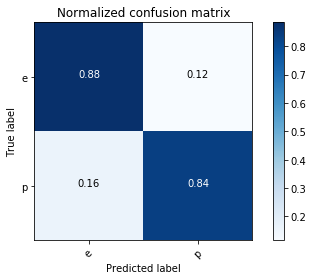

              precision    recall  f1-score   support

           e       0.90      0.91      0.90      1744
           p       0.85      0.84      0.84      1078

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.87      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8816442239546421


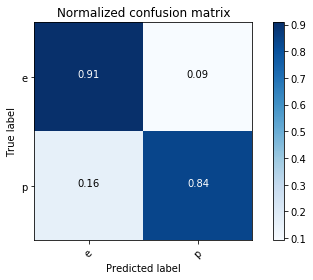

              precision    recall  f1-score   support

           e       0.90      0.89      0.90      1754
           p       0.83      0.83      0.83      1068

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8706591070163004


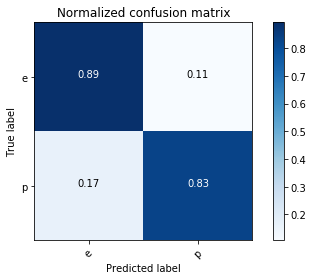

              precision    recall  f1-score   support

           e       0.89      0.88      0.89      1734
           p       0.82      0.83      0.82      1088

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.86      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8614457831325302


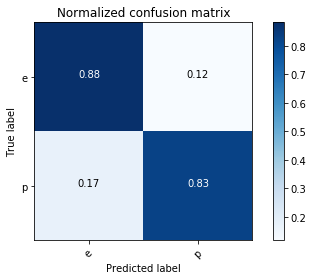

In [15]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.90      0.91      0.90      1783
           p       0.84      0.82      0.83      1039

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8745570517363572


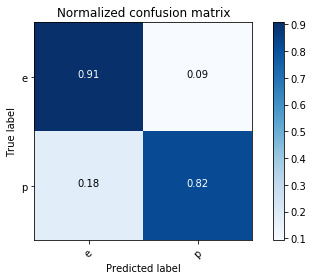

              precision    recall  f1-score   support

           e       0.88      0.91      0.89      1705
           p       0.85      0.80      0.83      1117

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.85      0.86      2822
weighted avg       0.86      0.87      0.86      2822

accuracy:  0.8653437278525868


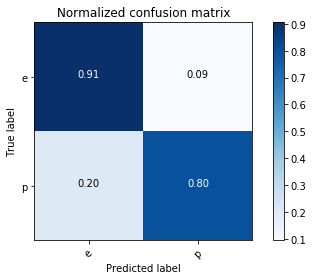

              precision    recall  f1-score   support

           e       0.89      0.91      0.90      1758
           p       0.84      0.81      0.82      1064

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8703047484053863


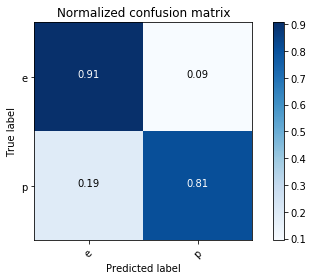

              precision    recall  f1-score   support

           e       0.88      0.91      0.90      1730
           p       0.85      0.80      0.83      1092

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8688873139617292


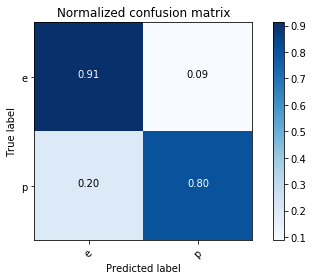

              precision    recall  f1-score   support

           e       0.89      0.90      0.90      1766
           p       0.83      0.81      0.82      1056

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8695960311835578


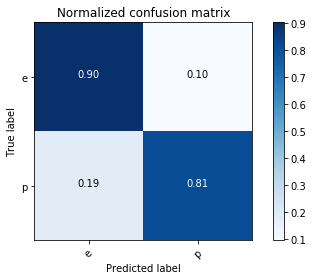

              precision    recall  f1-score   support

           e       0.87      0.91      0.89      1722
           p       0.84      0.80      0.82      1100

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8632175761871014


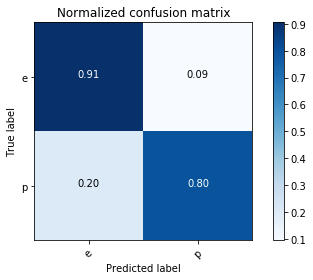

              precision    recall  f1-score   support

           e       0.89      0.90      0.90      1765
           p       0.84      0.82      0.83      1057

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8710134656272147


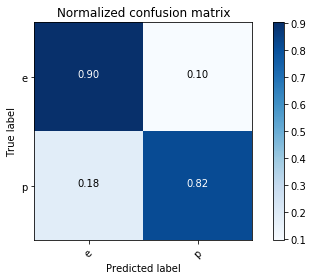

              precision    recall  f1-score   support

           e       0.88      0.92      0.90      1723
           p       0.86      0.80      0.83      1099

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8731396172927002


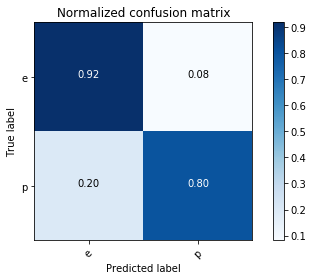

              precision    recall  f1-score   support

           e       0.87      0.92      0.90      1734
           p       0.86      0.79      0.82      1088

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8688873139617292


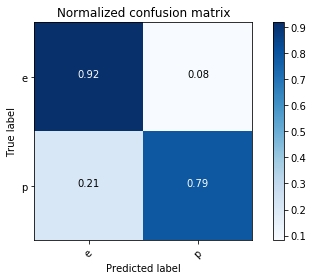

              precision    recall  f1-score   support

           e       0.89      0.88      0.89      1754
           p       0.81      0.81      0.81      1068

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8575478384124734


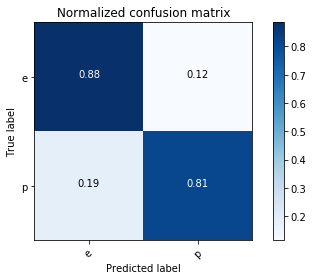

In [16]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1720
           p       0.88      0.78      0.83      1102

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.88      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.874202693125443


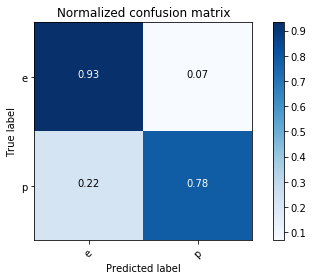

              precision    recall  f1-score   support

           e       0.87      0.94      0.90      1768
           p       0.88      0.77      0.82      1054

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.88      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8745570517363572


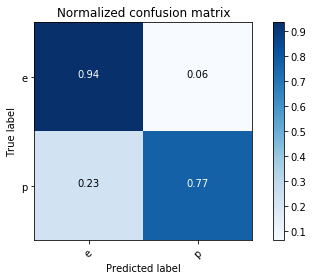

              precision    recall  f1-score   support

           e       0.89      0.91      0.90      1768
           p       0.85      0.80      0.82      1054

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8724309000708718


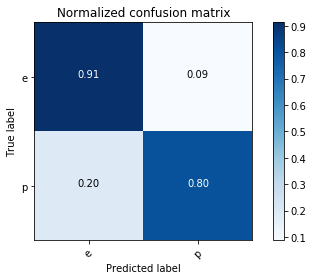

              precision    recall  f1-score   support

           e       0.86      0.95      0.90      1720
           p       0.91      0.75      0.82      1102

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.88      0.85      0.86      2822
weighted avg       0.88      0.87      0.87      2822

accuracy:  0.8734939759036144


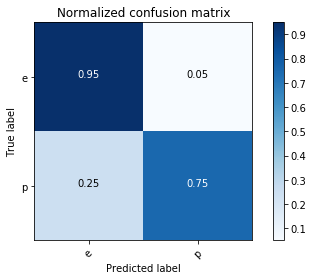

              precision    recall  f1-score   support

           e       0.88      0.93      0.91      1771
           p       0.87      0.80      0.83      1051

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.86      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8788093550673282


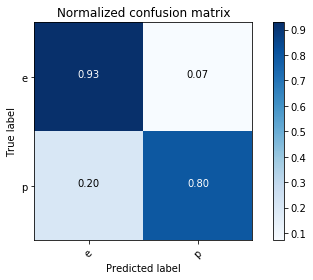

              precision    recall  f1-score   support

           e       0.86      0.94      0.90      1717
           p       0.89      0.76      0.82      1105

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.88      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8724309000708718


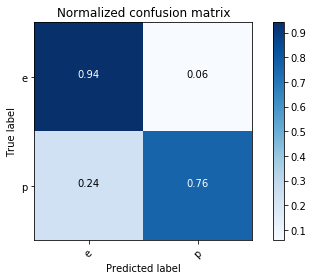

              precision    recall  f1-score   support

           e       0.87      0.92      0.90      1738
           p       0.86      0.78      0.82      1084

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8681785967399008


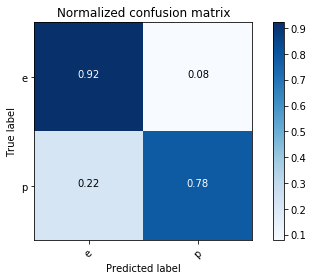

              precision    recall  f1-score   support

           e       0.87      0.94      0.91      1750
           p       0.89      0.78      0.83      1072

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.86      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8791637136782424


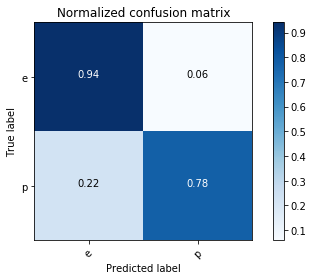

              precision    recall  f1-score   support

           e       0.88      0.94      0.91      1736
           p       0.89      0.80      0.84      1086

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.87      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8823529411764706


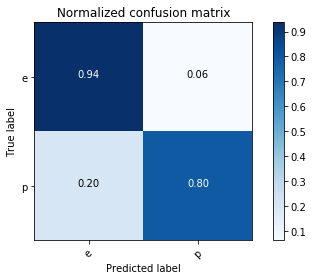

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1752
           p       0.86      0.75      0.81      1070

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8618001417434443


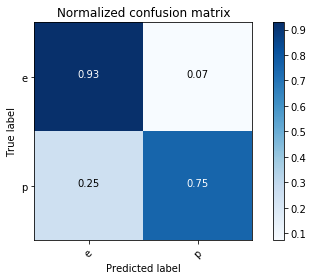

In [17]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.85      0.92      0.89      1734
           p       0.86      0.75      0.80      1088

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.856839121190645


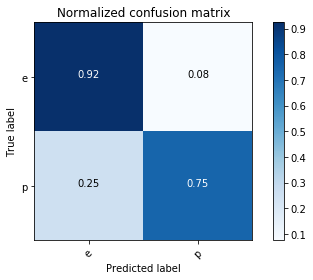

              precision    recall  f1-score   support

           e       0.89      0.90      0.90      1754
           p       0.84      0.82      0.83      1068

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.86      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8706591070163004


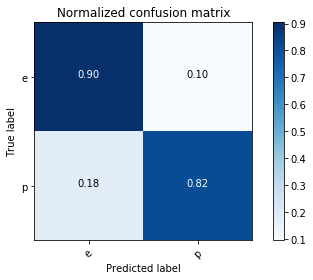

              precision    recall  f1-score   support

           e       0.87      0.92      0.90      1736
           p       0.86      0.79      0.82      1086

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.868532955350815


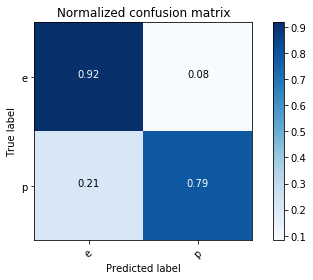

              precision    recall  f1-score   support

           e       0.87      0.92      0.89      1752
           p       0.85      0.78      0.82      1070

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.85      0.86      2822
weighted avg       0.86      0.87      0.86      2822

accuracy:  0.8656980864635011


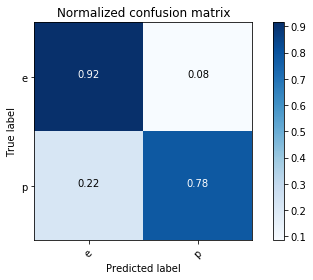

              precision    recall  f1-score   support

           e       0.88      0.93      0.91      1750
           p       0.88      0.80      0.83      1072

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.86      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8795180722891566


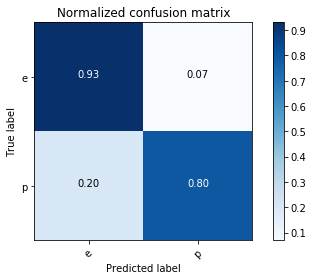

              precision    recall  f1-score   support

           e       0.87      0.92      0.89      1738
           p       0.86      0.77      0.81      1084

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.864280652019844


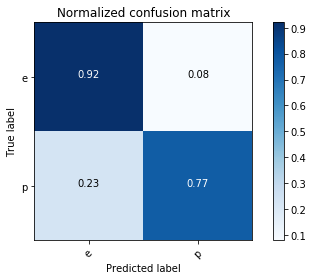

              precision    recall  f1-score   support

           e       0.88      0.89      0.89      1725
           p       0.83      0.81      0.82      1097

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.85      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8603827072997874


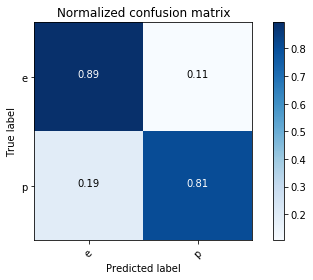

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1763
           p       0.86      0.78      0.82      1059

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.869950389794472


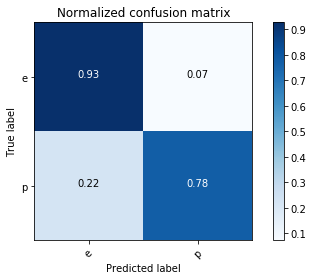

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1736
           p       0.87      0.77      0.82      1086

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8703047484053863


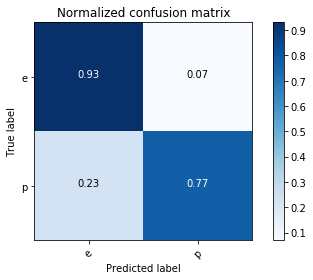

              precision    recall  f1-score   support

           e       0.88      0.91      0.90      1752
           p       0.84      0.80      0.82      1070

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8678242381289866


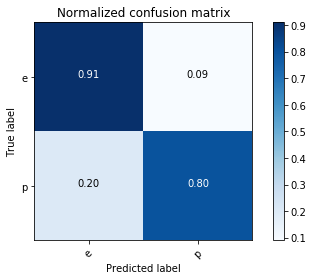

In [18]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.86      0.92      0.89      1755
           p       0.85      0.75      0.80      1067

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.84      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8571934798015591


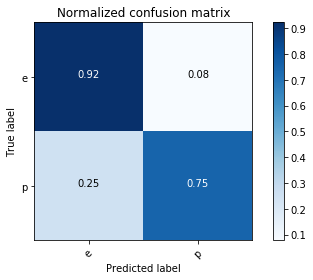

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1733
           p       0.87      0.76      0.81      1089

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8628632175761871


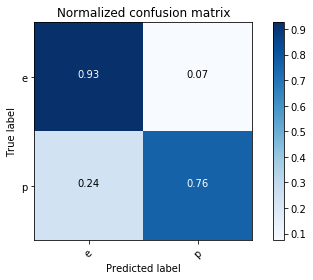

              precision    recall  f1-score   support

           e       0.87      0.94      0.91      1743
           p       0.89      0.78      0.83      1079

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.88      0.86      0.87      2822
weighted avg       0.88      0.88      0.88      2822

accuracy:  0.8809355067328136


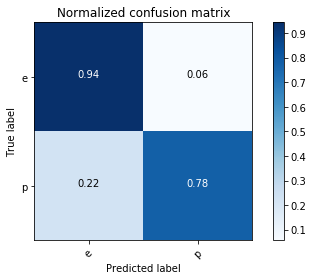

              precision    recall  f1-score   support

           e       0.86      0.92      0.89      1745
           p       0.85      0.77      0.81      1077

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8593196314670446


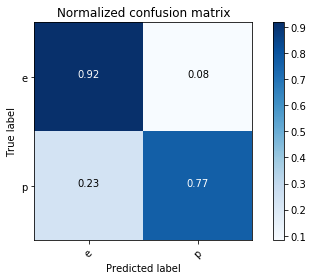

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1739
           p       0.87      0.77      0.82      1083

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8674698795180723


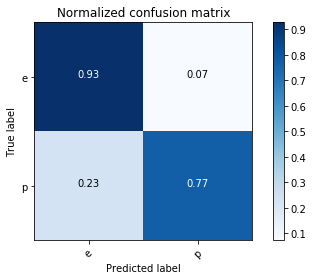

              precision    recall  f1-score   support

           e       0.86      0.93      0.90      1749
           p       0.87      0.76      0.81      1073

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.85      2822
weighted avg       0.87      0.87      0.86      2822

accuracy:  0.8664068036853295


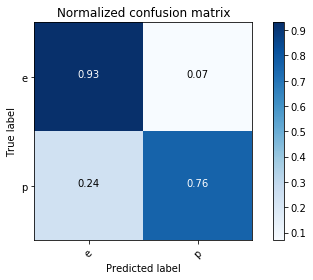

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1748
           p       0.87      0.75      0.81      1074

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8621545003543586


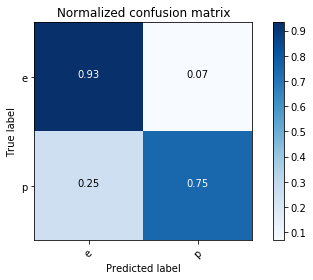

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1740
           p       0.88      0.78      0.82      1082

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.87      0.85      0.86      2822
weighted avg       0.87      0.87      0.87      2822

accuracy:  0.8724309000708718


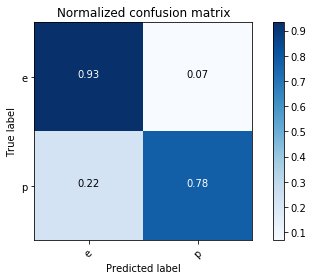

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1733
           p       0.88      0.79      0.83      1089

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.88      0.86      0.87      2822
weighted avg       0.88      0.87      0.87      2822

accuracy:  0.8749114103472715


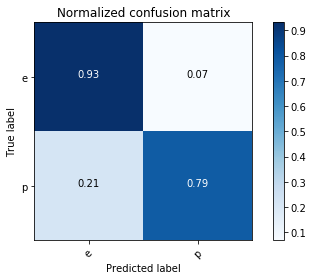

              precision    recall  f1-score   support

           e       0.86      0.93      0.89      1755
           p       0.86      0.75      0.80      1067

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8610914245216159


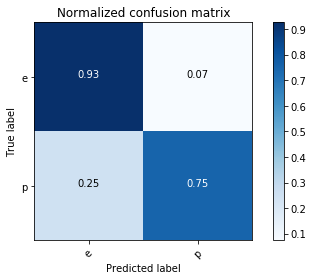

In [19]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.84      0.95      0.89      1709
           p       0.90      0.72      0.80      1113

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.87      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8593196314670446


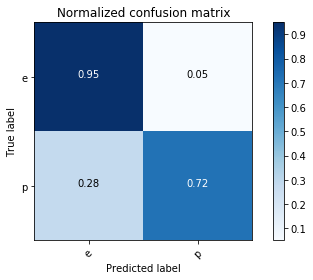

              precision    recall  f1-score   support

           e       0.86      0.92      0.89      1779
           p       0.84      0.75      0.79      1043

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.85      0.83      0.84      2822
weighted avg       0.85      0.86      0.85      2822

accuracy:  0.8550673281360737


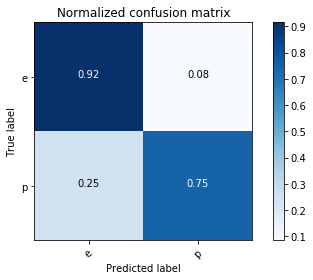

              precision    recall  f1-score   support

           e       0.87      0.93      0.90      1774
           p       0.86      0.76      0.81      1048

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.87      0.86      2822

accuracy:  0.8653437278525868


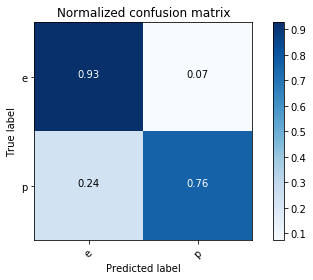

              precision    recall  f1-score   support

           e       0.84      0.93      0.88      1714
           p       0.86      0.72      0.79      1108

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.82      0.83      2822
weighted avg       0.85      0.85      0.84      2822

accuracy:  0.8454996456413891


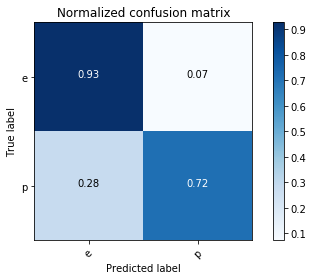

              precision    recall  f1-score   support

           e       0.83      0.94      0.88      1695
           p       0.88      0.71      0.79      1127

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.86      0.83      0.84      2822
weighted avg       0.85      0.85      0.84      2822

accuracy:  0.8479801559177887


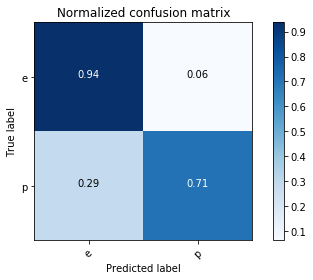

              precision    recall  f1-score   support

           e       0.86      0.92      0.89      1793
           p       0.85      0.75      0.79      1029

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.84      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8589652728561304


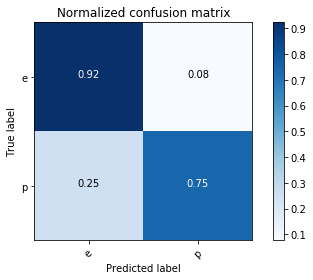

              precision    recall  f1-score   support

           e       0.84      0.93      0.88      1721
           p       0.87      0.71      0.79      1101

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.82      0.83      2822
weighted avg       0.85      0.85      0.84      2822

accuracy:  0.8479801559177887


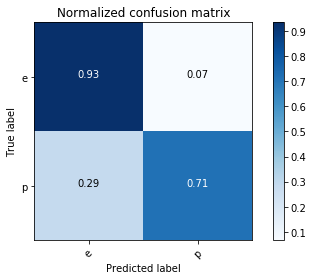

              precision    recall  f1-score   support

           e       0.86      0.92      0.89      1767
           p       0.86      0.76      0.80      1055

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.84      0.85      2822
weighted avg       0.86      0.86      0.86      2822

accuracy:  0.8618001417434443


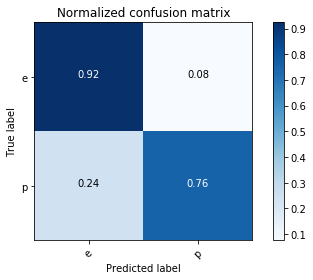

              precision    recall  f1-score   support

           e       0.85      0.93      0.89      1739
           p       0.87      0.73      0.79      1083

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.86      0.83      0.84      2822
weighted avg       0.86      0.86      0.85      2822

accuracy:  0.8550673281360737


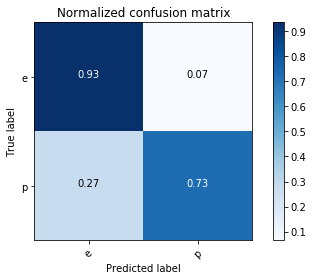

              precision    recall  f1-score   support

           e       0.85      0.92      0.89      1749
           p       0.85      0.74      0.79      1073

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.83      0.84      2822
weighted avg       0.85      0.85      0.85      2822

accuracy:  0.8529411764705882


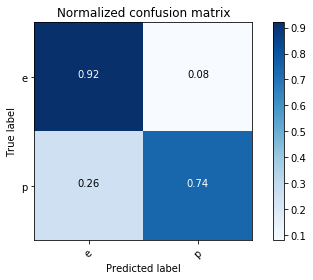

In [20]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.83      0.93      0.88      1761
           p       0.86      0.68      0.76      1061

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.84      0.81      0.82      2822
weighted avg       0.84      0.84      0.83      2822

accuracy:  0.8384124734231042


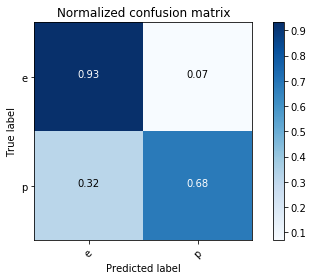

              precision    recall  f1-score   support

           e       0.82      0.94      0.88      1727
           p       0.88      0.67      0.76      1095

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.85      0.81      0.82      2822
weighted avg       0.84      0.84      0.83      2822

accuracy:  0.8387668320340185


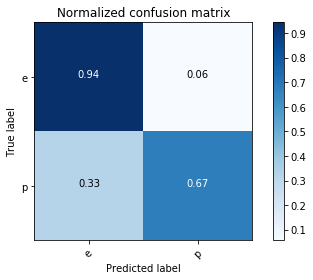

              precision    recall  f1-score   support

           e       0.81      0.95      0.87      1723
           p       0.89      0.66      0.76      1099

   micro avg       0.83      0.83      0.83      2822
   macro avg       0.85      0.80      0.82      2822
weighted avg       0.84      0.83      0.83      2822

accuracy:  0.8341601700921333


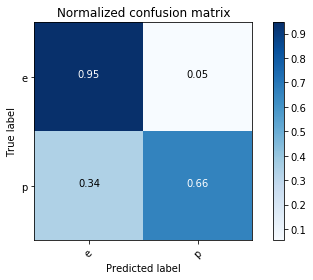

              precision    recall  f1-score   support

           e       0.84      0.92      0.88      1765
           p       0.84      0.70      0.77      1057

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.84      0.81      0.82      2822
weighted avg       0.84      0.84      0.84      2822

accuracy:  0.8405386250885897


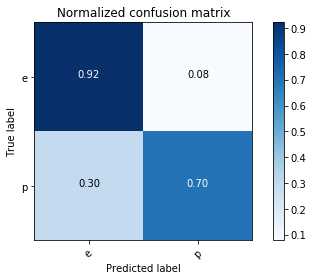

              precision    recall  f1-score   support

           e       0.83      0.93      0.88      1739
           p       0.86      0.69      0.77      1083

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.85      0.81      0.82      2822
weighted avg       0.84      0.84      0.83      2822

accuracy:  0.8387668320340185


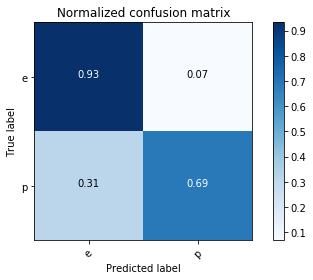

              precision    recall  f1-score   support

           e       0.83      0.94      0.88      1749
           p       0.87      0.68      0.76      1073

   micro avg       0.84      0.84      0.84      2822
   macro avg       0.85      0.81      0.82      2822
weighted avg       0.84      0.84      0.83      2822

accuracy:  0.8384124734231042


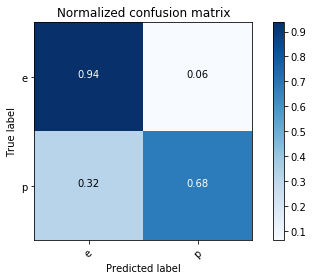

              precision    recall  f1-score   support

           e       0.81      0.94      0.87      1737
           p       0.88      0.65      0.75      1085

   micro avg       0.83      0.83      0.83      2822
   macro avg       0.85      0.80      0.81      2822
weighted avg       0.84      0.83      0.83      2822

accuracy:  0.8327427356484762


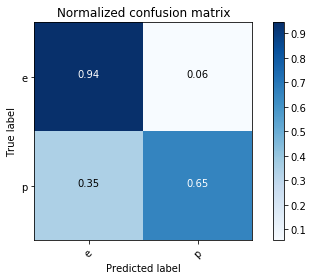

              precision    recall  f1-score   support

           e       0.84      0.93      0.88      1751
           p       0.86      0.71      0.78      1071

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.82      0.83      2822
weighted avg       0.85      0.85      0.84      2822

accuracy:  0.8458540042523033


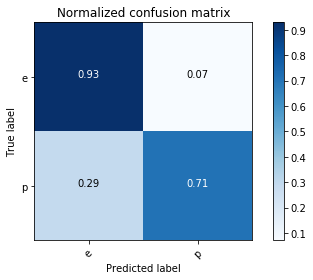

              precision    recall  f1-score   support

           e       0.84      0.93      0.88      1769
           p       0.86      0.71      0.78      1053

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.85      0.82      0.83      2822
weighted avg       0.85      0.85      0.84      2822

accuracy:  0.8479801559177887


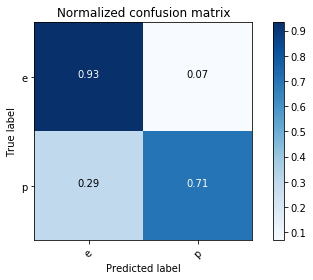

              precision    recall  f1-score   support

           e       0.81      0.94      0.87      1719
           p       0.87      0.66      0.75      1103

   micro avg       0.83      0.83      0.83      2822
   macro avg       0.84      0.80      0.81      2822
weighted avg       0.83      0.83      0.82      2822

accuracy:  0.8274273564847626


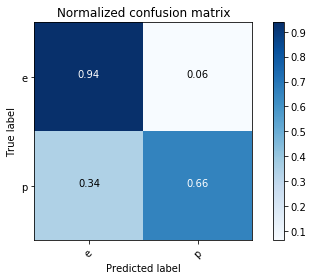

In [21]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.78      0.96      0.86      1749
           p       0.91      0.56      0.69      1073

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.84      0.76      0.78      2822
weighted avg       0.83      0.81      0.80      2822

accuracy:  0.8104181431608788


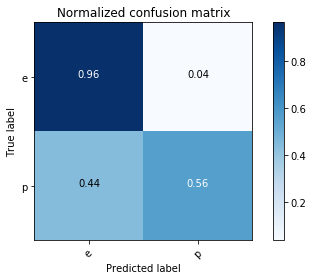

              precision    recall  f1-score   support

           e       0.78      0.96      0.86      1739
           p       0.90      0.57      0.70      1083

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.84      0.77      0.78      2822
weighted avg       0.83      0.81      0.80      2822

accuracy:  0.81218993621545


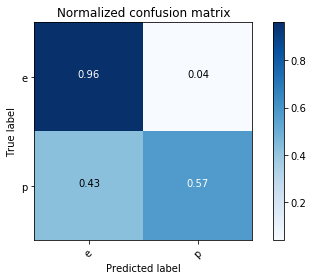

              precision    recall  f1-score   support

           e       0.78      0.97      0.86      1699
           p       0.93      0.58      0.71      1123

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.85      0.77      0.79      2822
weighted avg       0.84      0.81      0.80      2822

accuracy:  0.8139617292700213


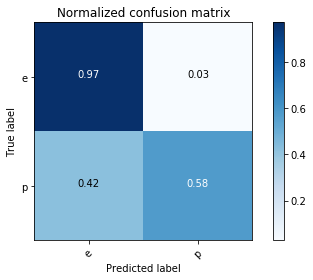

              precision    recall  f1-score   support

           e       0.78      0.95      0.86      1789
           p       0.87      0.55      0.67      1033

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.83      0.75      0.77      2822
weighted avg       0.82      0.80      0.79      2822

accuracy:  0.8043940467753367


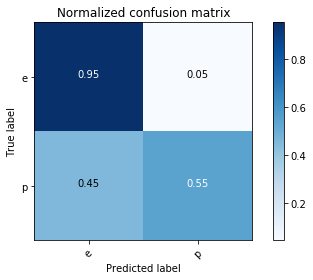

              precision    recall  f1-score   support

           e       0.78      0.97      0.86      1731
           p       0.91      0.57      0.70      1091

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.85      0.77      0.78      2822
weighted avg       0.83      0.81      0.80      2822

accuracy:  0.8114812189936216


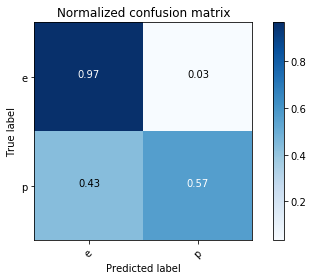

              precision    recall  f1-score   support

           e       0.78      0.95      0.86      1757
           p       0.88      0.56      0.69      1065

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.83      0.76      0.77      2822
weighted avg       0.82      0.81      0.79      2822

accuracy:  0.8058114812189936


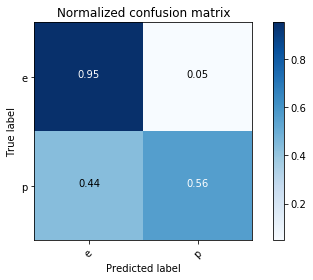

              precision    recall  f1-score   support

           e       0.78      0.96      0.86      1760
           p       0.89      0.56      0.69      1062

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.84      0.76      0.77      2822
weighted avg       0.82      0.81      0.80      2822

accuracy:  0.8086463501063076


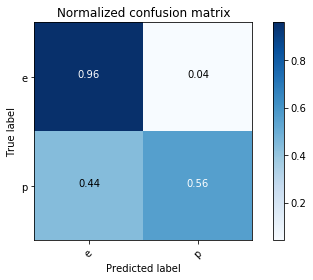

              precision    recall  f1-score   support

           e       0.78      0.96      0.86      1728
           p       0.91      0.56      0.69      1094

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.84      0.76      0.78      2822
weighted avg       0.83      0.81      0.79      2822

accuracy:  0.8072289156626506


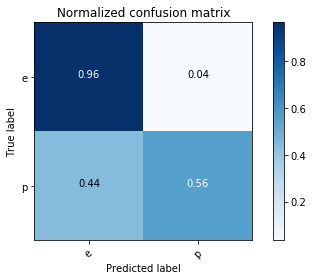

              precision    recall  f1-score   support

           e       0.77      0.97      0.86      1738
           p       0.93      0.55      0.69      1084

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.85      0.76      0.78      2822
weighted avg       0.83      0.81      0.80      2822

accuracy:  0.8097094259390503


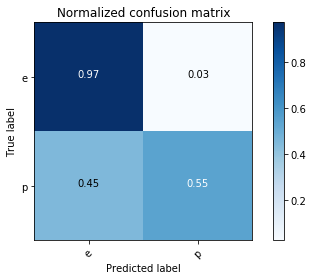

              precision    recall  f1-score   support

           e       0.78      0.95      0.86      1750
           p       0.87      0.57      0.69      1072

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.82      0.76      0.77      2822
weighted avg       0.81      0.80      0.79      2822

accuracy:  0.8029766123316796


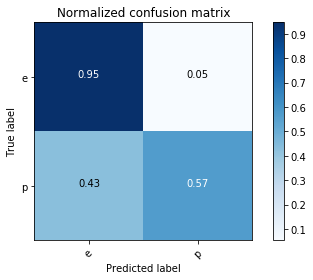

In [22]:
acc.append("Minkowski 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           e       0.75      0.99      0.85      1711
           p       0.96      0.49      0.65      1111

   micro avg       0.79      0.79      0.79      2822
   macro avg       0.85      0.74      0.75      2822
weighted avg       0.83      0.79      0.77      2822

accuracy:  0.7916371367824239


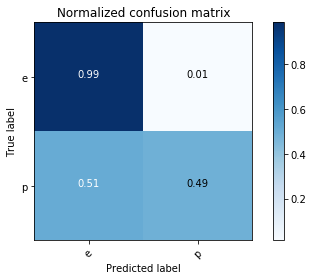

              precision    recall  f1-score   support

           e       0.77      0.99      0.86      1777
           p       0.96      0.50      0.66      1045

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.86      0.74      0.76      2822
weighted avg       0.84      0.81      0.79      2822

accuracy:  0.8058114812189936


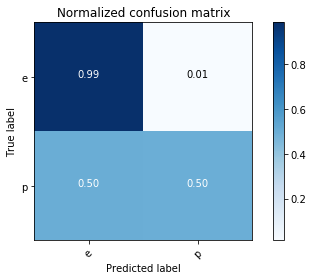

              precision    recall  f1-score   support

           e       0.76      0.97      0.85      1732
           p       0.91      0.52      0.66      1090

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.84      0.75      0.76      2822
weighted avg       0.82      0.80      0.78      2822

accuracy:  0.796243798724309


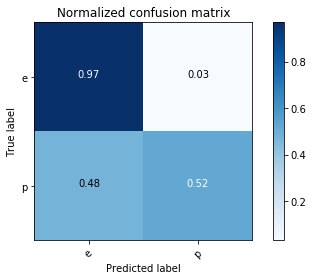

              precision    recall  f1-score   support

           e       0.76      1.00      0.86      1756
           p       0.99      0.47      0.64      1066

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.87      0.73      0.75      2822
weighted avg       0.84      0.80      0.78      2822

accuracy:  0.797661233167966


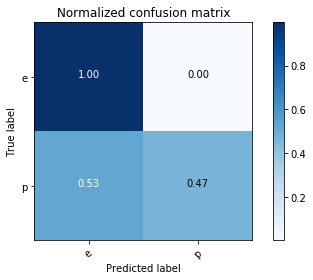

              precision    recall  f1-score   support

           e       0.78      0.98      0.87      1766
           p       0.95      0.52      0.68      1056

   micro avg       0.81      0.81      0.81      2822
   macro avg       0.86      0.75      0.77      2822
weighted avg       0.84      0.81      0.80      2822

accuracy:  0.8111268603827073


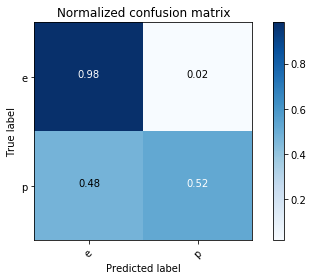

              precision    recall  f1-score   support

           e       0.75      0.99      0.85      1722
           p       0.98      0.47      0.64      1100

   micro avg       0.79      0.79      0.79      2822
   macro avg       0.86      0.73      0.75      2822
weighted avg       0.84      0.79      0.77      2822

accuracy:  0.7905740609496811


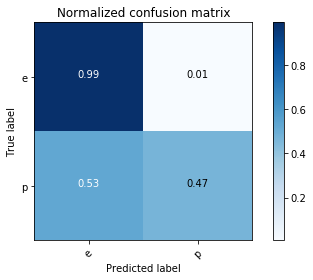

              precision    recall  f1-score   support

           e       0.76      0.99      0.86      1743
           p       0.97      0.49      0.65      1079

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.86      0.74      0.75      2822
weighted avg       0.84      0.80      0.78      2822

accuracy:  0.7983699503897945


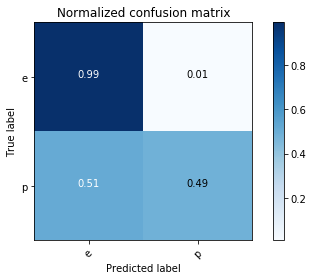

              precision    recall  f1-score   support

           e       0.76      0.98      0.86      1745
           p       0.94      0.50      0.65      1077

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.85      0.74      0.76      2822
weighted avg       0.83      0.80      0.78      2822

accuracy:  0.7980155917788803


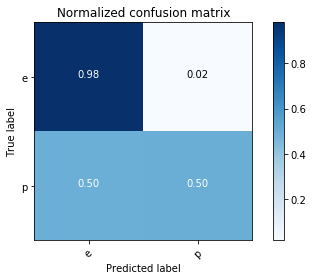

              precision    recall  f1-score   support

           e       0.77      0.97      0.86      1762
           p       0.91      0.51      0.65      1060

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.84      0.74      0.76      2822
weighted avg       0.82      0.80      0.78      2822

accuracy:  0.7969525159461375


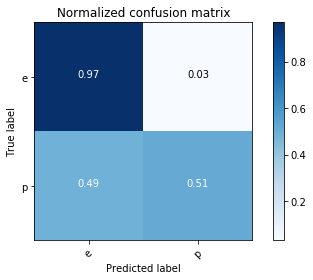

              precision    recall  f1-score   support

           e       0.75      1.00      0.86      1726
           p       0.99      0.49      0.65      1096

   micro avg       0.80      0.80      0.80      2822
   macro avg       0.87      0.74      0.75      2822
weighted avg       0.84      0.80      0.78      2822

accuracy:  0.797661233167966


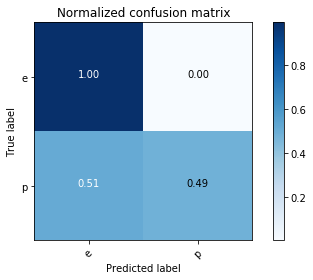

In [23]:
acc.append("Minkowski 150")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [24]:
with open("accMushroomKNNWith20Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)
    #writer.writerow(list_of_emails)